In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [54]:
start = '2012-01-01'
end = '2024-12-31'
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [55]:
data.reset_index(inplace=True)

In [56]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3264,2024-12-23,195.990005,196.490005,191.630005,194.029999,15235900
3265,2024-12-24,197.570007,197.669998,195.197998,196.169998,6809800
3266,2024-12-26,197.100006,198.160004,195.869995,196.740005,7907900


In [57]:

print(data)

Price        Date       Close        High         Low        Open     Volume
Ticker                   GOOG        GOOG        GOOG        GOOG       GOOG
0      2012-01-03   16.513794   16.581795   16.190173   16.204321  147611217
1      2012-01-04   16.585020   16.633911   16.394919   16.504364  114989399
2      2012-01-05   16.354961   16.478056   16.285969   16.432392  131808205
3      2012-01-06   16.131853   16.379531   16.126144   16.358435  108119746
4      2012-01-09   15.447884   16.056905   15.417357   16.044495  233776981
...           ...         ...         ...         ...         ...        ...
3264   2024-12-23  195.990005  196.490005  191.630005  194.029999   15235900
3265   2024-12-24  197.570007  197.669998  195.197998  196.169998    6809800
3266   2024-12-26  197.100006  198.160004  195.869995  196.740005    7907900
3267   2024-12-27  194.039993  196.800003  191.972000  196.470001   14693000
3268   2024-12-30  192.690002  193.779999  190.360001  190.865005   12209500

In [58]:
ma_100_days = data.Close.rolling(100).mean()

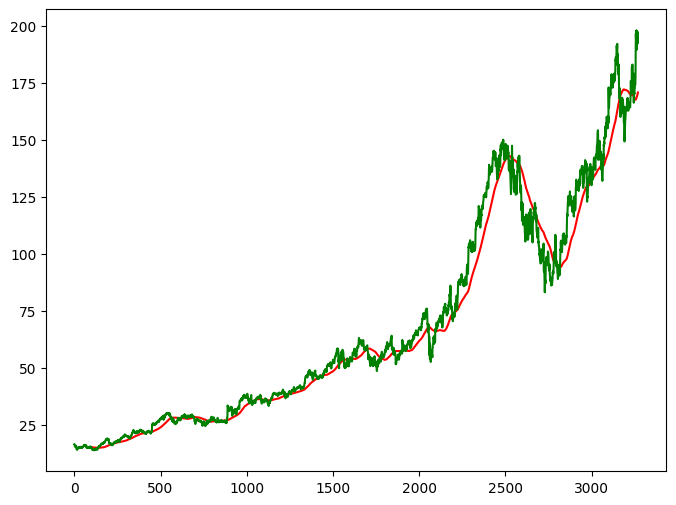

In [59]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [60]:
ma_200_days = data.Close.rolling(200).mean()

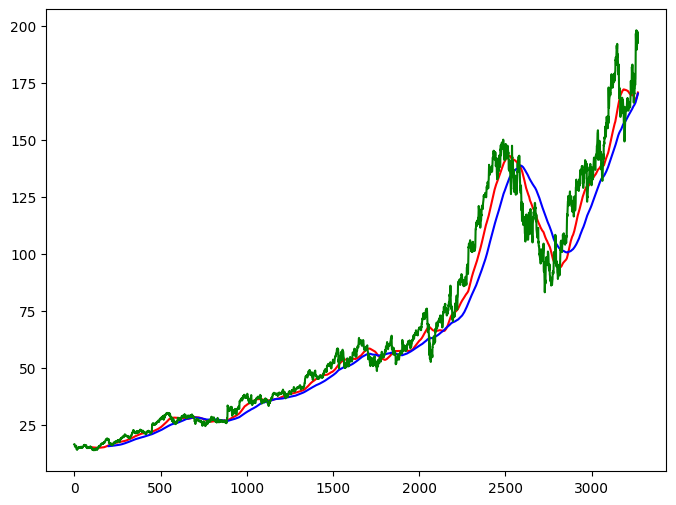

In [61]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [62]:
data.dropna(inplace=True)

In [63]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [64]:
data_train.shape[0]

2615

In [65]:
data_test.shape[0]

654

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
data_train_scale = scaler.fit_transform(data_train)

In [80]:
x = []
y = []
for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [92]:
x,y = np.array(x), np.array(y)

In [93]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [96]:
model = Sequential()
model.add(LSTM(units = 50 ,activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
          
model.add(LSTM(units = 60 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [97]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [98]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 301ms/step - loss: 0.0495
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 286ms/step - loss: 0.0062
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - loss: 0.0042
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - loss: 0.0042
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - loss: 0.0039
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - loss: 0.0031
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - loss: 0.0034
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - loss: 0.0030
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 278ms/step - loss: 0.0030
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - loss: 0.0025
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 293ms/step - loss: 0.0027
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - loss: 0.0030
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - loss: 0.0027
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - loss: 0.0028
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [99]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [100]:
pas_100_days = data_train.tail(100)

In [101]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [102]:
data_test_scale = scaler.fit_transform(data_test)

In [103]:
x = []
y = []
for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y = np.array(x), np.array(y)

In [104]:
y_predict = model.predict(x)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step


In [105]:
scale=1/scaler.scale_

In [106]:
y_predict = y_predict*scale

In [107]:
y = y*scale

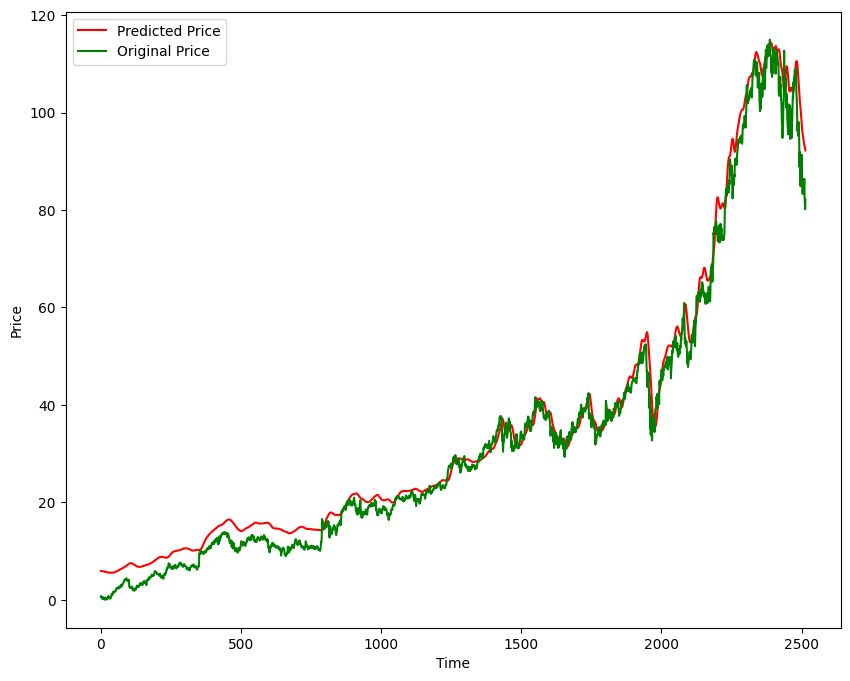

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.clf()  # Clears previous plots
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [112]:
model.save('Stock Predictions Model.keras')